In [48]:
import json
import sys
import numpy as np
import numpy.ma as ma
from itertools import zip_longest
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from ast import literal_eval
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
path = '/Users/chrislam/Desktop/sculpting/'
df = pd.read_csv(path+'hipergator/logLs.csv')
berger_kepler = pd.read_csv(path+'berger_kepler_stellar17.csv') 
k = [833, 134, 38, 15, 5, 0] # EXCLUDES THE ZERO BIN

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Figure 1

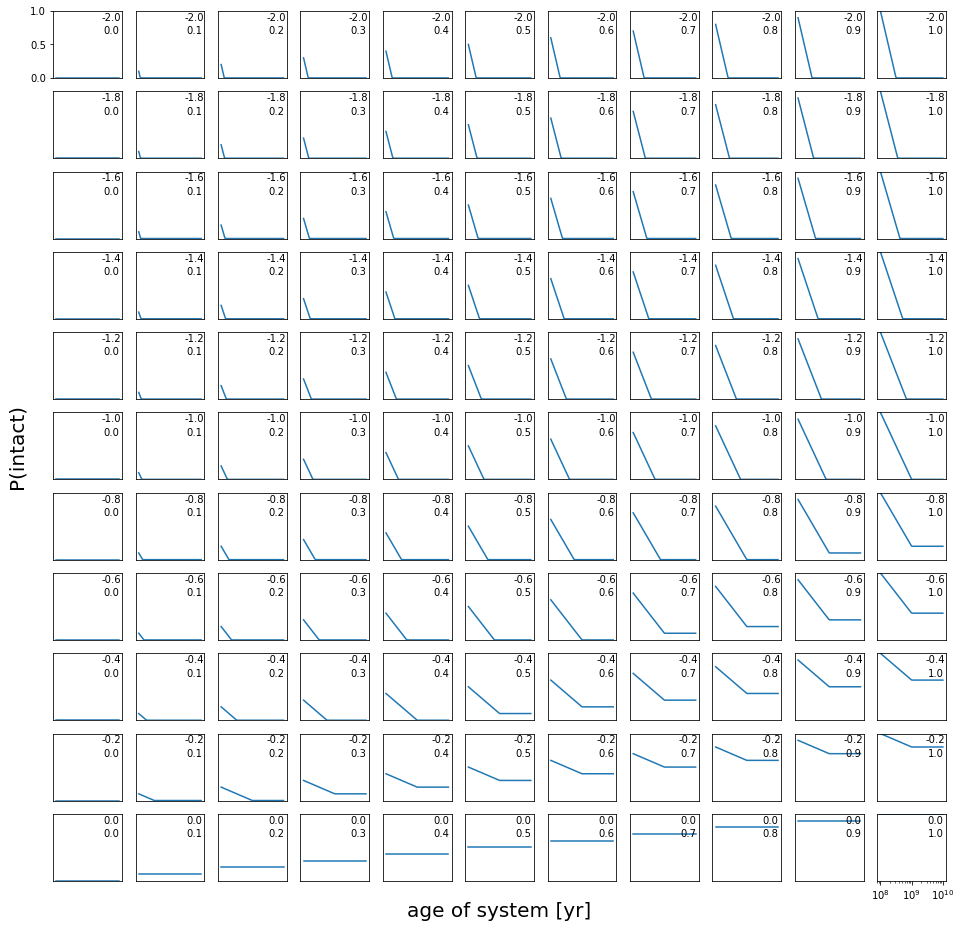

In [24]:
def plot_prob(x, m, b, cutoff):
    #return x*np.log10(m) + b
    #return -np.log10(x*m) + b
    #return -np.log10(x*m) + b # y=mx+b
    #return -np.log10(m * (x-1e8)) + b # linear equation given slope and one point, but with slope and x axis logged
    y = []
    for x_elt in x:
        if x_elt <= 1e8:
            y.append(b)
        elif (x_elt > 1e8) & (x_elt <= cutoff):
            y_elt = b + m*(np.log10(x_elt)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt)
        elif x_elt > cutoff: # if star is older than cutoff, use P(intact) at cutoff time
            y_elt = b + m*(np.log10(cutoff)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt) 
            
    return y

x = np.logspace(8, 10, 100)
fig, axes = plt.subplots(figsize=(16,16))
index = 0
ms = np.linspace(-2, 0, 11)
bs = np.linspace(0, 1, 11)
for i, gi_m in enumerate(ms):
    for j, gi_b in enumerate(bs):
        ax = plt.subplot2grid((11,11), (i,j))
        ax.text(0.85, 0.9, round(gi_m, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.text(0.85, 0.7, round(gi_b, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        
        #cube = [random.uniform(0,1), random.uniform(0,1)]
        #cube = prior_grid(cube, ndim, nparams, gi_m, gi_b)
        cutoff = 1e9 # placeholder
        #print(round(gi_m, 1), df.bs[index])
        y = plot_prob(x, round(gi_m, 1), round(gi_b, 1), cutoff)
        #y = compute_prob(x, round(gi_m, 1), df.bs[index], cutoff)
        #y = prob_intact(x, round(df.ms[index], 1), df.bs[index], cutoff)
        #y = prob_intact(x, np.linspace(-1,0,11)[gi_m], np.linspace(0,1,11)[gi_b])
        ax.plot(x, y)
        ax.set_ylim([0, 1])
        
        if index < 1:
            ax.get_yaxis().set_visible(True)
        else:
            ax.get_yaxis().set_visible(False)
        
        if index < 120:
            ax.get_xaxis().set_visible(False)
        else:
            ax.get_xaxis().set_visible(True)            

        ax.set_xscale('log')
        
        index += 1
        
        # plot vertical red line through median age of Berger FGK dwarfs
        #ax.plot([1e9*np.median(berger_kepler.iso_age), 1e9*np.median(berger_kepler.iso_age)], 
        #        [0,1], color='r', alpha=0.3, linestyle='--')

# add axis labels in the middle of the subplot
fig.add_subplot(111, frameon=False)
# this hack introduces tick marks, so hide them
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('age of system [yr]', fontsize=20)
plt.ylabel('P(intact)', fontsize=20)
plt.savefig(path+'paper/models.eps', format='eps')
plt.show()

### Misc stats and plots for Master's presentation

In [60]:
# amd of solar sys; from https://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?bibcode=1997A%26A...317L..75L&db_key=AST&page_ind=0&data_type=GIF&type=SCREEN_VIEW&classic=YES
#2.2e8*(1e-10)*(1e33)*(1.5e13)**2/(3.154e7)
1500*(1e-10)*(1e33)*(1.5e13)**2/(3.154e7)

1.0700697526949903e+45

In [89]:
# eccentricities and inclinations of Solar System planets
ecc_ss = [0.2056, 0.0068, 0.0167, 0.0934, 0.0484, 0.0541, 0.0472, 0.0086]
inc_ss = np.array([6.34, 2.19, 1.57, 1.67, 0.32, 0.93, 1.02, 0.72])
print(np.mean(ecc_ss))
print(np.mean(inc_ss))
print(np.median(ecc_ss))
print(np.median(inc_ss))

0.0601
1.845
0.047799999999999995
1.295


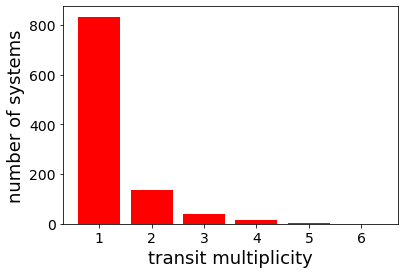

In [98]:
plt.bar(np.arange(len(k)+1)[1:], k, color='r')
plt.xlabel('transit multiplicity', fontsize=18)
plt.ylabel('number of systems', fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.savefig('kepler_transit_multiplicity.eps', format='eps', bbox_inches='tight')
plt.show()

In [80]:
df.transit_multiplicities_all

0               [[3977, 402], [4094, 385], [4070, 385]]
1      [[4073, 416, 1, 1], [4071, 422], [4077, 397, 1]]
2     [[4133, 370, 2, 1], [4054, 370, 1, 3], [4070, ...
3            [[4059, 408, 1], [4048, 397], [4050, 414]]
4     [[3926, 391, 2, 1, 1], [4061, 414, 1, 1], [411...
5     [[3864, 548, 130, 79, 32, 7], [3883, 526, 137,...
6     [[3794, 676, 257, 173, 79, 16], [3667, 647, 26...
7         [[4053, 388], [4007, 413, 1], [3964, 421, 1]]
8     [[4092, 387, 1, 1], [4027, 417, 1], [4003, 404...
9     [[3883, 524, 136, 107, 33, 10], [3922, 572, 13...
10    [[3819, 690, 246, 165, 97, 11], [3856, 680, 26...
11    [[3569, 816, 390, 240, 129, 19], [3665, 770, 3...
12    [[3596, 937, 475, 389, 158, 39], [3468, 903, 5...
13           [[4154, 393, 1], [4100, 374], [4002, 401]]
14    [[3872, 547, 127, 75, 43, 6], [3995, 495, 147,...
15    [[3748, 668, 276, 168, 82, 18], [3891, 659, 26...
16    [[3617, 783, 373, 278, 130, 23], [3627, 804, 3...
17    [[3531, 930, 516, 365, 173, 30], [3461, 87

### Pymultinest

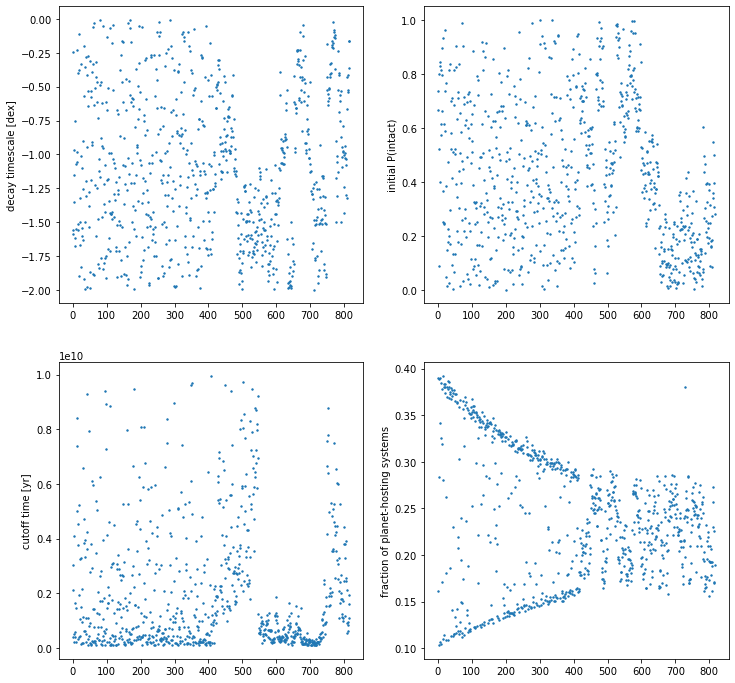

In [91]:
multinest_df = pd.read_csv(path+'hipergator/pymultinest/test_1_.txt', sep='\s+',
                           names=['error','logL','m','b','c','f'])
#print(multinest_df)

fig, axes = plt.subplots(figsize=(12,12))
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.scatter(multinest_df.index, multinest_df.m, s=2)
ax1.set_ylabel('decay timescale [dex]')

ax2 = plt.subplot2grid((2,2), (0,1))
ax2.scatter(multinest_df.index, multinest_df.b, s=2)
ax2.set_ylabel('initial P(intact)')

ax3 = plt.subplot2grid((2,2), (1,0))
ax3.scatter(multinest_df.index, multinest_df.c, s=2)
ax3.set_ylabel('cutoff time [yr]')

ax4 = plt.subplot2grid((2,2), (1,1))
ax4.scatter(multinest_df.index, multinest_df.f, s=2)
ax4.set_ylabel('fraction of planet-hosting systems')
plt.savefig('posterior_chains.eps', format='eps')
plt.show()